In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('abalone.csv', header = None, names = ['Gender', 'Length', 'Diameter', 'Height', 'Weight',
                                                       'Meatweight', 'Gutweight', 'Shellweight', 'Rings'])

In [3]:
df.head()

,Gender,Length,Diameter,Height,Weight,Meatweight,Gutweight,Shellweight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,Weight,Meatweight,Gutweight,Shellweight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Exploring the Dataset

## Statistically testing significance of the Gender variable

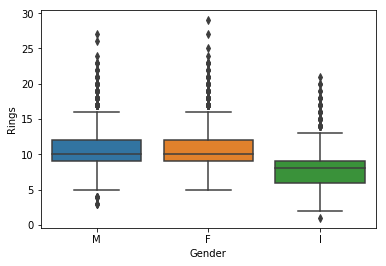

In [5]:
sns.boxplot(df['Gender'], df['Rings'])

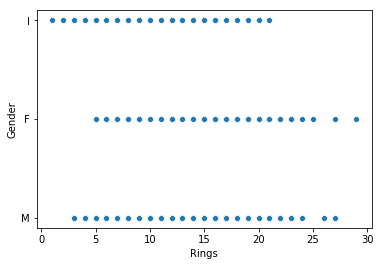

In [6]:
sns.scatterplot(df['Rings'], df['Gender'])

In [7]:
df['Gender'].value_counts()

M    1528
I    1342
F    1307
Name: Gender, dtype: int64

In [8]:
df1 = df.groupby(by = 'Gender')

In [9]:
df_M = df1.get_group('M')
df_I = df1.get_group('I')
df_F = df1.get_group('F')

In [10]:
from scipy.stats import f_oneway
f_oneway(df_M['Rings'],df_I['Rings'],df_F['Rings'])

F_onewayResult(statistic=499.33254468883234, pvalue=3.724620497195191e-195)

In [11]:
from scipy.stats import ttest_ind
ttest_ind(df_M['Rings'], df_F['Rings'])

Ttest_indResult(statistic=-3.672931653810761, pvalue=0.0002442194034410819)

In [5]:
gender = df.copy()

In [6]:
gender.loc[(gender['Gender'] == 'F'), 'Gender'] = 0
gender.loc[(gender['Gender'] == 'M'), 'Gender'] = 0
gender.loc[(gender['Gender'] == 'I'), 'Gender'] = 1

In [7]:
gender1 = gender.groupby(by = 'Gender')

In [8]:
df_A = gender1.get_group(0)
df_B = gender1.get_group(1)

In [10]:
from scipy.stats import ttest_ind
ttest_ind(df_A['Rings'], df_B['Rings'])

Ttest_indResult(statistic=31.309479563331593, pvalue=1.7570730727940785e-193)

<b>The scatterplot and box plot imply that the gender classes M and F have the same mean. This was tested out above using statistical tests and it has been determined that they do not have the same mean. Thus all three classes of the Gender variabe will be used for building the models.<b/>

## Applying Statistical tests on all other variables in the dataset:

In [12]:
df.corr()

,Length,Diameter,Height,Weight,Meatweight,Gutweight,Shellweight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Meatweight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Gutweight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shellweight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [13]:
from scipy.stats import levene
levene(df['Rings'], df['Meatweight'])

LeveneResult(statistic=3473.1362646148496, pvalue=0.0)

In [14]:
from scipy.stats import levene
levene(df['Rings'], df['Gutweight'])

LeveneResult(statistic=3773.7078340648172, pvalue=0.0)

In [15]:
from scipy.stats import levene
levene(df['Rings'], df['Weight'])

LeveneResult(statistic=2773.3044849940134, pvalue=0.0)

In [16]:
from scipy.stats import levene
levene(df['Rings'], df['Length'])

LeveneResult(statistic=3750.203979379155, pvalue=0.0)

In [17]:
from scipy.stats import levene
levene(df['Rings'], df['Height'])

LeveneResult(statistic=3970.176219698619, pvalue=0.0)

In [18]:
from scipy.stats import levene
levene(df['Rings'], df['Diameter'])

LeveneResult(statistic=3805.5419405374623, pvalue=0.0)

In [19]:
from scipy.stats import levene
levene(df['Rings'], df['Shellweight'])

LeveneResult(statistic=3694.512730629199, pvalue=0.0)

<b>In conclusion, all variables are significant in this dataset.<b/>

# Verifying Assumptions

## Multicollinearity

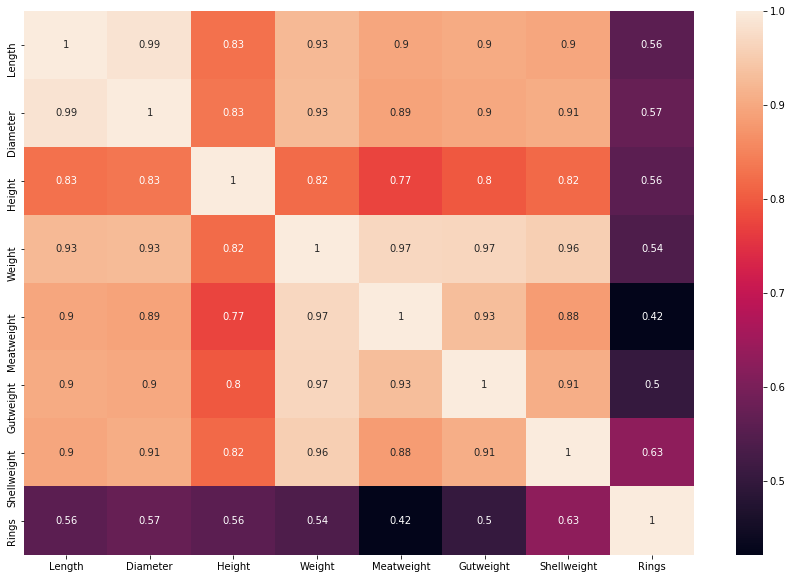

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

<b>From the heatmap above, it is clear that there is high multicollinearity among the variables, but removing them is tricky as they are all significant and have fairly high correlation with the target variables Rings.<b/>

In [5]:
dummies = pd.get_dummies(df['Gender']).rename(columns=lambda x: 'Gender_' + str(x))
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Gender'], axis=1)

In [6]:
df

,Length,Diameter,Height,Weight,Meatweight,Gutweight,Shellweight,Rings,Gender_F,Gender_I,Gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


## Homoscedasticity

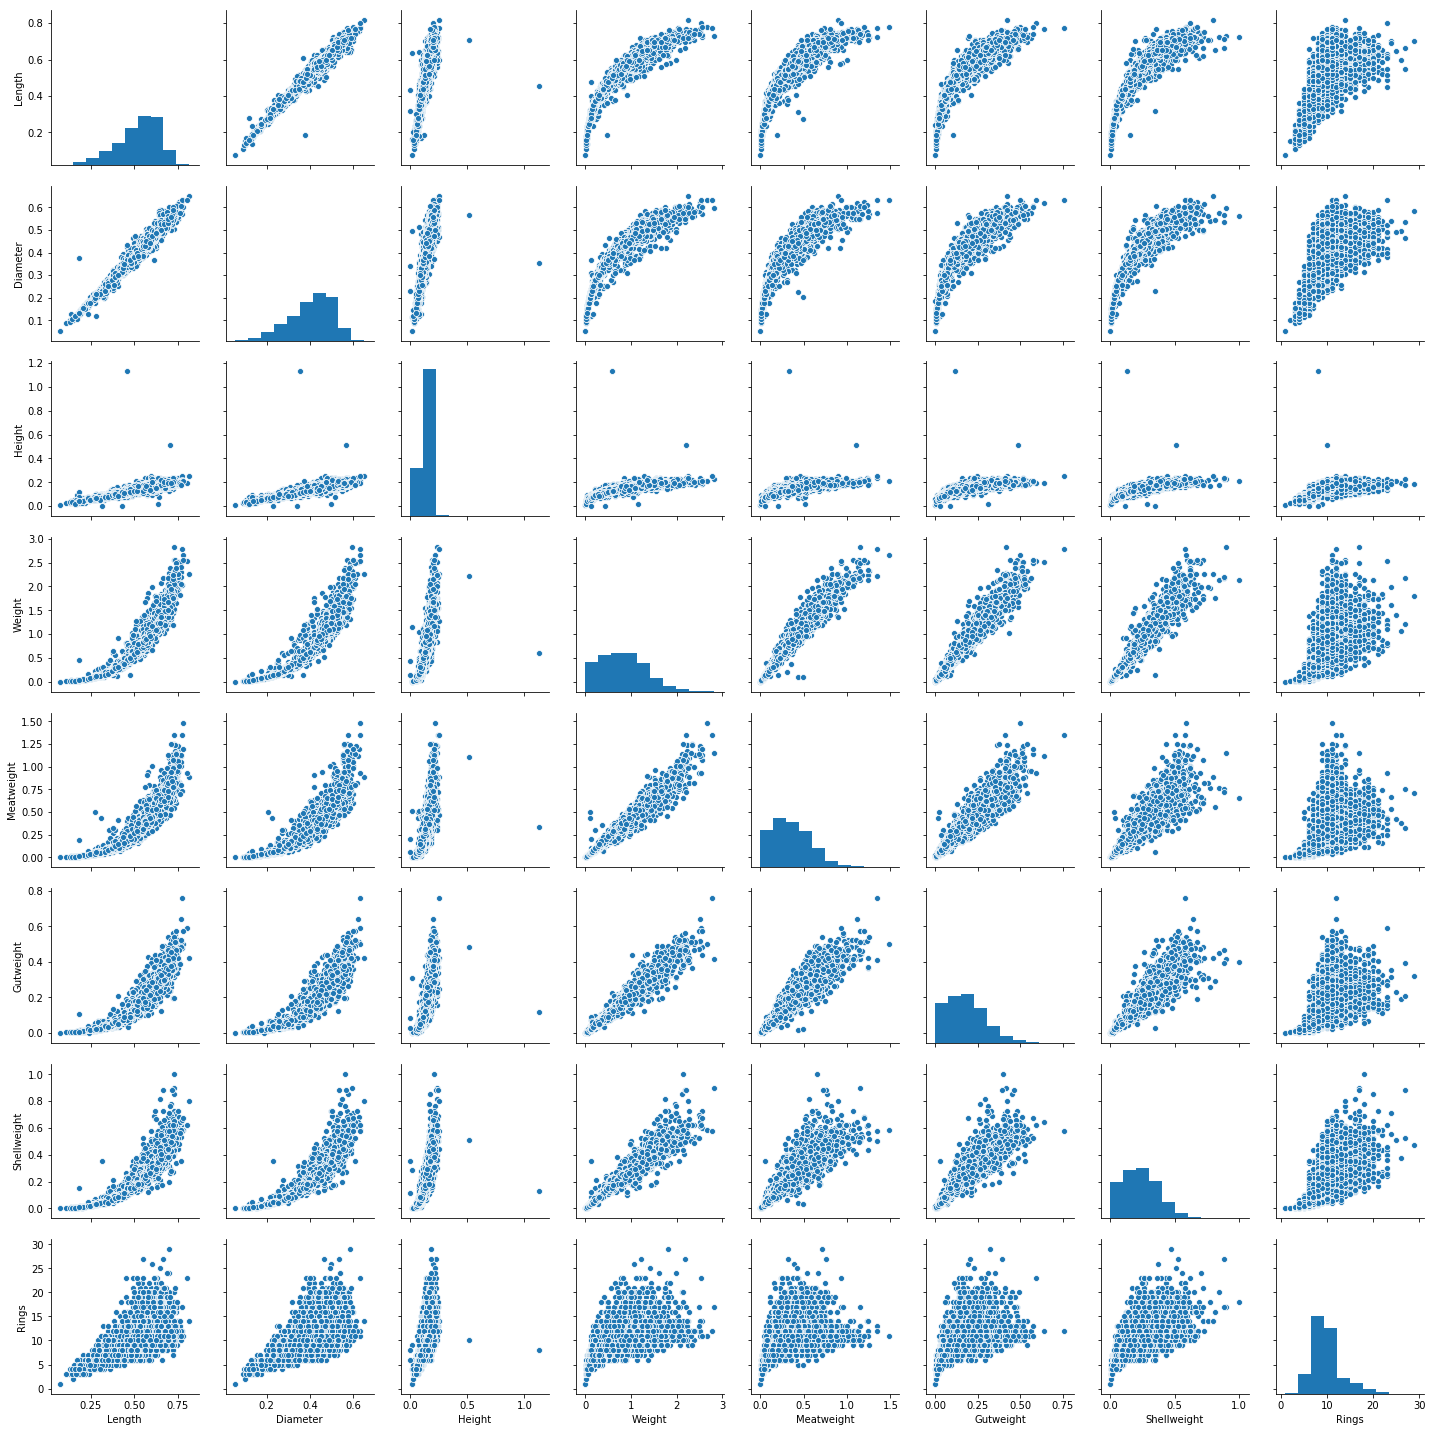

In [11]:
sns.pairplot(df, diag_kind = 'hist')

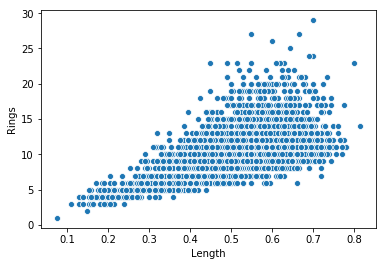

In [23]:
sns.scatterplot(df['Length'], df['Rings'])

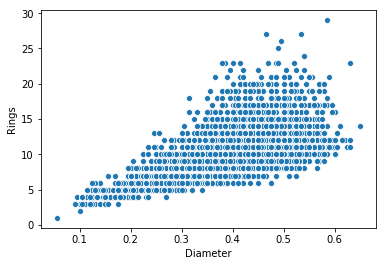

In [24]:
sns.scatterplot(df['Diameter'], df['Rings'])

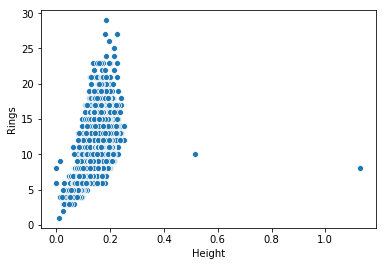

In [25]:
sns.scatterplot(df['Height'], df['Rings'])

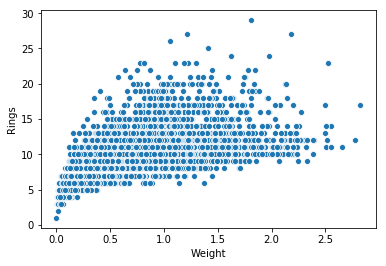

In [7]:
sns.scatterplot(df['Weight'], df['Rings'])

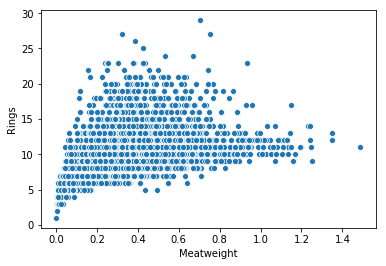

In [27]:
sns.scatterplot(df['Meatweight'], df['Rings'])

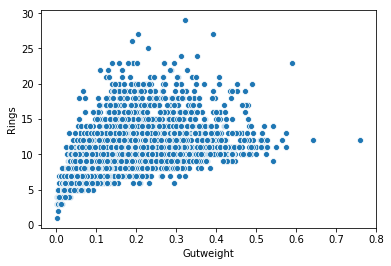

In [28]:
sns.scatterplot(df['Gutweight'], df['Rings'])

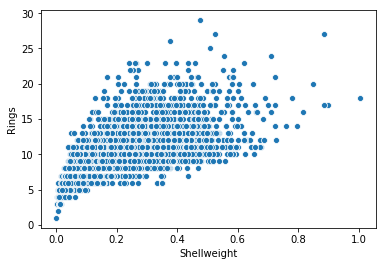

In [29]:
sns.scatterplot(df['Shellweight'], df['Rings'])

<b>Looking at the above pair plot and scatter plots, it is clear that there is high heteroscedasticity.<b/>

In [8]:
import statsmodels.api as sm
x = df.drop(['Rings'], axis = 1)
y = df['Rings']
xc = sm.add_constant(x)
model = sm.OLS(y, xc).fit()
model.summary()

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sun, 01 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:13:40   Log-Likelihood:                -9204.1
No. Observations:                4177   AIC:                         1.843e+04
Df Residuals:                    4167   BIC:                         1.849e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7292      0.207     13.185      0.000       2.323       3.135
Length         -0.4583      1.809     -0.253      0.800      -4.005       3.089
Diameter       11.0751      2.227      4.972      0.000       6.708      15.442
Height         10.7615      1.536      7.005      0.000       7.750      13.773
Weight          8.9754      0.725     12.373      0.000       7.553      10.398
Meatweight    -19.7869      0.817    -24.209      0.000     -21.389     -18.184
Gutweight     -10.5818      1.294     -8.179      0.000     -13.118      -8.045
Shellweight     8.7418      1.125      7.772      0.000       6.537      10.947
Gender_F        1.1655      0.095     12.209      0.000       0.978       1.353
Gender_I        0.3406      0.079      4.318      0.000       0.186       0.495
Gender_M        1.2232      0.088     13.838      0.000       1.050       1.396
==============================================================================
Omnibus:                      947.032   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2710.271
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       6.162   Cond. No.                     1.19e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.54e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Linearity

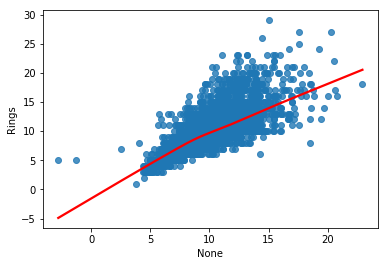

In [11]:
y_pred = model.predict(xc)
sns.regplot(x=y_pred, y=y, lowess=True, line_kws={'color':'red'})
plt.show()

<b>Clearly, the data is not linear<b/>

## Normality

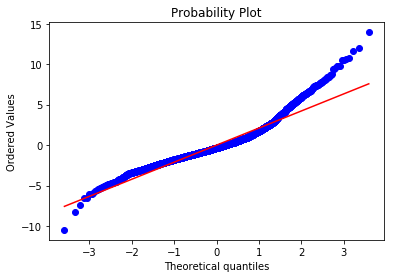

In [10]:
import scipy.stats as stats
stats.probplot(res, plot = plt)
plt.show()

In [14]:
stats.shapiro(res)

(0.9256653189659119, 2.2318480641301361e-41)

<b>The graphical and statistical tests both reveal that the data is not normally distributed.<b/>

## Auto Correlation

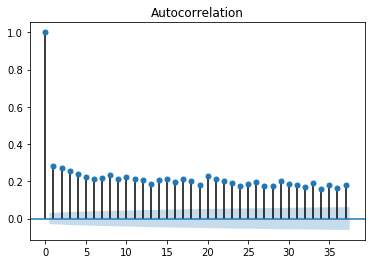

In [15]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(res)
plt.show()

<b>DW value from the model result is 1.436. The expected value for no autocorrelation is 2. Hence, there is slight indication of auto-correlation<b/>

### The dataset does not satisfy any of the assumptions for linear regression. 
### Next step is to check if transforming the dataset has any impact.

# Transforming the data:

In [16]:
## for sqrt(X)
df2 = df.copy()
df2 = df2.drop(['Gender_F', 'Gender_I', 'Gender_M'], axis = 1)
sqrt_df = df2.transform(lambda x: x**0.5)
sqrt_df.head()

,Length,Diameter,Height,Weight,Meatweight,Gutweight,Shellweight,Rings
0,0.674537,0.604152,0.308221,0.716938,0.473814,0.317805,0.387298,3.872983
1,0.591608,0.514782,0.300000,0.474868,0.315436,0.220227,0.264575,2.645751
2,0.728011,0.648074,0.367423,0.822800,0.506458,0.376165,0.458258,3.000000
3,0.663325,0.604152,0.353553,0.718331,0.464220,0.337639,0.393700,3.162278
4,0.574456,0.504975,0.282843,0.452769,0.299166,0.198746,0.234521,2.645751


In [17]:
sqrt_df['Gender_F'] = df['Gender_F']
sqrt_df['Gender_I'] = df['Gender_I']
sqrt_df['Gender_M'] = df['Gender_M']

In [18]:
sqrt_df.head()

,Length,Diameter,Height,Weight,Meatweight,Gutweight,Shellweight,Rings,Gender_F,Gender_I,Gender_M
0,0.674537,0.604152,0.308221,0.716938,0.473814,0.317805,0.387298,3.872983,0,0,1
1,0.591608,0.514782,0.300000,0.474868,0.315436,0.220227,0.264575,2.645751,0,0,1
2,0.728011,0.648074,0.367423,0.822800,0.506458,0.376165,0.458258,3.000000,1,0,0
3,0.663325,0.604152,0.353553,0.718331,0.464220,0.337639,0.393700,3.162278,0,0,1
4,0.574456,0.504975,0.282843,0.452769,0.299166,0.198746,0.234521,2.645751,0,1,0


In [19]:
import statsmodels.api as sm
x = sqrt_df.drop(['Rings'], axis = 1)
y = sqrt_df['Rings']
xc = sm.add_constant(x)
model = sm.OLS(y, xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     692.3
Date:                Sun, 01 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:44:47   Log-Likelihood:                -1080.9
No. Observations:                4177   AIC:                             2182.
Df Residuals:                    4167   BIC:                             2245.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8993      0.073     12.337      0.000       0.756       1.042
Length         -0.1246      0.378     -0.330      0.741      -0.865       0.616
Diameter        1.8717      0.406      4.613      0.000       1.076       2.667
Height          1.5667      0.204      7.692      0.000       1.167       1.966
Weight          2.5642      0.208     12.324      0.000       2.156       2.972
Meatweight     -3.9111      0.156    -25.151      0.000      -4.216      -3.606
Gutweight      -1.3312      0.176     -7.581      0.000      -1.675      -0.987
Shellweight     1.6700      0.179      9.307      0.000       1.318       2.022
Gender_F        0.3322      0.026     12.750      0.000       0.281       0.383
Gender_I        0.2260      0.025      8.941      0.000       0.176       0.276
Gender_M        0.3411      0.025     13.497      0.000       0.292       0.391
==============================================================================
Omnibus:                      531.897   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.299
Skew:                           0.828   Prob(JB):                    4.48e-212
Kurtosis:                       4.689   Cond. No.                     1.34e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

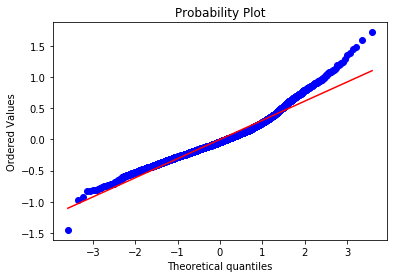

In [22]:
import scipy.stats as stats
res = model.resid
stats.probplot(res, plot = plt)
plt.show()

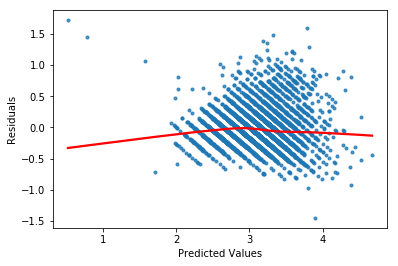

In [23]:
#testing for homoscedacity
residuals = model.resid
y_pred = model.predict(xc)
sns.regplot(y = residuals, x = y_pred, lowess = True, line_kws = {'color':'red'}, marker = ".")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### While the data has become more normal, there isn't much change otherwise. The other assumptions are not satisfied yet.

### Check vif because multicollinearity is present:

In [38]:
### calculating the vif values as multicollinearity exists (as stated by warning 2)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(x.values, j) for j in range(1, x.shape[1])]

[48.64574845779415,
 5.602446792906557,
 153.5718484503036,
 39.335680706697694,
 24.734420238734884,
 31.51596846426708,
 127.72760782244734,
 128.27329525382805,
 147.23659899352327]

In [39]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [40]:
train_out = calculate_vif(x)

Iteration no.
1
[47.68138292023505, 48.64574845779415, 5.602446792906557, 153.5718484503036, 39.335680706697694, 24.734420238734884, 31.51596846426708, 127.72760782244734, 128.27329525382805, 147.23659899352327]
Max VIF is for variable no.:
3
Iteration no.
2
[47.67949742204527, 48.638839304051814, 5.581366611047963, 13.448176896372889, 16.003978100210368, 13.37143420782424, 127.23590555288824, 127.58646396228349, 146.64577046063246]
Max VIF is for variable no.:
8
Iteration no.
3
[2670.068506739382, 2826.021561021343, 230.99652279833313, 111.15049648524678, 146.95919058506186, 114.20216521072093, 1.8822226061939027, 2.5965015100668496]
Max VIF is for variable no.:
1
Iteration no.
4
[233.11841122572227, 226.88501896190843, 111.13571536807774, 146.6148785097108, 108.98968254587287, 1.8808962484978462, 2.589618604534]
Max VIF is for variable no.:
0
Iteration no.
5
[47.77647527125531, 108.69691956266695, 146.566187470979, 108.9400390057496, 1.8737582025286053, 2.2793886358312547]
Max VIF is

In [41]:
train_out.head()

,Meatweight,Gender_F,Gender_I
0,0.473814,0,0
1,0.315436,0,0
2,0.506458,1,0
3,0.464220,0,0
4,0.299166,0,1


In [42]:
import statsmodels.api as sm
x = train_out
y = sqrt_df['Rings']
xc = sm.add_constant(x)
model = sm.OLS(y, xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     665.2
Date:                Sat, 22 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:38:07   Log-Likelihood:                -2174.3
No. Observations:                4177   AIC:                             4357.
Df Residuals:                    4173   BIC:                             4382.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6292      0.027     98.984      0.000       2.577       2.681
Meatweight     0.9680      0.039     25.073      0.000       0.892       1.044
Gender_F       0.0485      0.015      3.160      0.002       0.018       0.079
Gender_I      -0.2497      0.018    -14.266      0.000      -0.284      -0.215
==============================================================================
Omnibus:                      736.479   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1348.993
Skew:                           1.103   Prob(JB):                    1.17e-293
Kurtosis:                       4.699   Cond. No.                         9.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### After applying vif, only three features were deemed important. Although multicollinearity is removed, the R2 value is too low

In [43]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [44]:
x = sqrt_df.drop(['Rings'], axis = 1)
y = sqrt_df['Rings']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
reg = RidgeCV()
reg.fit(x_train, y_train)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: 0.598543


In [46]:
y_pred = reg.predict(x_test)

In [47]:
y_pred

array([2.95225978, 2.7394343 , 2.85632446, ..., 2.93537037, 2.93436635,
       2.35352968])

In [48]:
df_ridge = pd.DataFrame([y_test, y_pred]).T

In [49]:
df_ridge

,Rings,Unnamed 0
17,3.162278,3.609985
1131,2.828427,3.617378
299,3.000000,3.300839
1338,3.162278,NaN
2383,4.000000,NaN
...,...,...
802,3.000000,3.563592
3016,2.645751,NaN
2886,2.828427,NaN
2580,2.828427,NaN


In [50]:
imp_coef = coef.sort_values()
imp_coef

Meatweight    -3.851469
Gutweight     -1.035573
Gender_I      -0.071025
Length        -0.022136
Gender_F       0.025948
Gender_M       0.045077
Height         1.419252
Shellweight    1.722701
Diameter       1.821908
Weight         2.374629
dtype: float64

Lasso CV

In [51]:
x = sqrt_df.drop(['Rings'], axis = 1)
y = sqrt_df['Rings']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
reg = LassoCV()
reg.fit(x_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 0.000108
Best score using built-in LassoCV: 0.598249


In [53]:
y_pred = reg.predict(x_test)

In [54]:
y_pred

array([2.95128682, 2.73550584, 2.85577294, ..., 2.93226355, 2.93375161,
       2.35837952])

In [55]:
imp_coef = coef.sort_values()
imp_coef

Meatweight    -3.857568
Gutweight     -0.932046
Gender_I      -0.096022
Length         0.000000
Gender_F      -0.000000
Gender_M       0.018844
Height         1.348034
Shellweight    1.725148
Diameter       1.747535
Weight         2.356699
dtype: float64

### Applying ML linear regressor

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
x = sqrt_df.drop(['Rings'], axis = 1)
y = sqrt_df['Rings']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [59]:
from sklearn.metrics import r2_score, mean_squared_error
print('R² of Train data:', r2_score(y_train, y_train_pred))
print('RMSE of Train data:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R² of Test data:', r2_score(y_test, y_test_pred))
print('RMSE of Test data:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

R² of Train data: 0.6052094033137876
RMSE of Train data: 0.3131465899260206
R² of Test data: 0.5822125550347449
RMSE of Test data: 0.31497250799582366


# SCALING:

In [60]:
ab = pd.read_csv('abalone.csv', header = None, names = ['Gender', 'Length', 'Diameter', 'Height', 'Weight',
                                                       'Meatweight', 'Gutweight', 'Shellweight', 'Rings'])

In [61]:
dummies = pd.get_dummies(ab['Gender']).rename(columns=lambda x: 'Gender_' + str(x))
ab = pd.concat([ab, dummies], axis=1)
ab = ab.drop(['Gender'], axis=1)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ab[ab.columns] = scaler.fit_transform(ab[ab.columns])

In [63]:
ab

,Length,Diameter,Height,Weight,Meatweight,Gutweight,Shellweight,Rings,Gender_F,Gender_I,Gender_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000,0.0,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286,0.0,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714,1.0,0.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429,0.0,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143,1.0,0.0,0.0
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429,0.0,0.0,1.0
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714,0.0,0.0,1.0
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429,1.0,0.0,0.0


In [64]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split
x = ab.drop(['Rings'], axis = 1)
y = ab['Rings']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
reg = RidgeCV()
reg.fit(x_train, y_train)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: 0.537199


In [65]:
y_test.shape

(836,)

In [66]:
y_pred = reg.predict(x_test)

In [67]:
y_pred

array([ 0.28645968,  0.22724487,  0.26094605,  0.29753495,  0.34838005,
        0.17858409,  0.37524043,  0.33772577,  0.32142186,  0.28069128,
        0.37872547,  0.16884849,  0.32978399,  0.38412876,  0.21001791,
        0.28556287,  0.35829798,  0.43849615,  0.3301751 ,  0.35124618,
        0.33470091,  0.32182156,  0.22305808,  0.4074775 ,  0.31818865,
        0.35793717,  0.47468113,  0.36151037,  0.40832773,  0.3699484 ,
        0.35823738,  0.35681826,  0.36031975,  0.29164194,  0.2138602 ,
        0.34654408,  0.38914696,  0.45502496,  0.39008878,  0.36337146,
        0.38550266,  0.21737564,  0.48055523,  0.37954183,  0.1824085 ,
        0.27287742,  0.35767804,  0.30586579,  0.33224492,  0.35370866,
        0.28742029,  0.30241616,  0.37869323,  0.17082719,  0.42376509,
        0.32899253,  0.31976231,  0.27097956,  0.26077203,  0.24019859,
        0.29996022,  0.2349991 ,  0.41636634,  0.28745335,  0.30413865,
        0.2816852 ,  0.37166928,  0.33651489,  0.35493464,  0.26

# Linear Regression with KFold Validation

In [92]:
from sklearn import model_selection
QR=LinearRegression()
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(QR, x, y, cv = kfold, scoring ='r2')
results.append((abs(cv_results)))
print(np.mean(np.abs(cv_results)))
print(results)

0.5235792632761443
[array([0.52804753, 0.54967957, 0.49301069])]


In [279]:
QR=LinearRegression()
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(QR, x, y ,cv = kfold, scoring='neg_mean_squared_error')
results.append(np.sqrt(np.abs(cv_results)))
print("%f (%f)" % (np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))

2.224783 (0.007947)


# Linear Regression on Transformed dataset using KFold Validation:

In [99]:
df3 = pd.read_csv('abalone.csv', header = None, names = ['Gender', 'Length', 'Diameter', 'Height', 'Weight',
                                                       'Meatweight', 'Gutweight', 'Shellweight', 'Rings'])
#transform_df = df2.transform(lambda x: x**0.5)
df3

,Gender,Length,Diameter,Height,Weight,Meatweight,Gutweight,Shellweight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [100]:
dummies = pd.get_dummies(df3['Gender']).rename(columns=lambda x: 'Gender_' + str(x))
df3 = pd.concat([df3, dummies], axis=1)
df3 = df3.drop(['Gender'], axis=1)

In [102]:
df3.head()

,Length,Diameter,Height,Weight,Meatweight,Gutweight,Shellweight,Rings,Gender_F,Gender_I,Gender_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [104]:
labels = df3.columns.tolist()

In [105]:
labels.remove('Rings')

In [106]:
for i in labels:
    df3[i] = np.sqrt(df3[i])
    
df3

,Length,Diameter,Height,Weight,Meatweight,Gutweight,Shellweight,Rings,Gender_F,Gender_I,Gender_M
0,0.674537,0.604152,0.308221,0.716938,0.473814,0.317805,0.387298,15,0.0,0.0,1.0
1,0.591608,0.514782,0.300000,0.474868,0.315436,0.220227,0.264575,7,0.0,0.0,1.0
2,0.728011,0.648074,0.367423,0.822800,0.506458,0.376165,0.458258,9,1.0,0.0,0.0
3,0.663325,0.604152,0.353553,0.718331,0.464220,0.337639,0.393700,10,0.0,0.0,1.0
4,0.574456,0.504975,0.282843,0.452769,0.299166,0.198746,0.234521,7,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.751665,0.670820,0.406202,0.941807,0.608276,0.488876,0.498999,11,1.0,0.0,0.0
4173,0.768115,0.663325,0.367423,0.982853,0.662571,0.463141,0.510392,10,0.0,0.0,1.0
4174,0.774597,0.689202,0.452769,1.084435,0.724914,0.536190,0.554977,9,0.0,0.0,1.0
4175,0.790569,0.696419,0.387298,1.046184,0.728697,0.510882,0.544059,10,1.0,0.0,0.0


In [107]:
x1 = df3.drop(['Rings'], axis = 1)
y1 = df3['Rings']

In [108]:
QR=LinearRegression()
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(QR, x1, y1, cv = kfold, scoring ='r2')
results.append((abs(cv_results)))
print(np.mean(np.abs(cv_results)))
print(results)

0.555932239683904
[array([0.54881571, 0.56766491, 0.5513161 ])]


In [278]:
QR=LinearRegression()
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(QR, x1, y1 ,cv = kfold, scoring='neg_mean_squared_error')
results.append(np.sqrt(np.abs(cv_results)))
print("%f (%f)" % (np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))

2.148148 (0.001857)


# Applying other Non-Linear Regression Models:

## 1. KNN Regressor

### Finding optimal number of neighbors and weight calculation method using Grid Search CV

In [211]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [118]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()
knn_params = {'n_neighbors':np.arange(3,100),'weights':['uniform','distance']}

In [129]:
GS=GridSearchCV(knn,knn_params,cv=3,scoring='neg_mean_squared_error')

In [120]:
GS.fit(x,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=Tr

In [121]:
GS.best_params_

{'n_neighbors': 16, 'weights': 'distance'}

In [126]:
KNN = KNeighborsRegressor(n_neighbors = 16, weights = 'distance')
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(KNN, x, y, cv = kfold, scoring ='r2')
results.append((abs(cv_results)))
print(np.mean(np.abs(cv_results)))
print(results)

0.5369087076639413
[array([0.54721244, 0.52910878, 0.5344049 ])]


In [127]:
KNN = KNeighborsRegressor(n_neighbors = 16, weights = 'distance')
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(KNN, x, y,cv=kfold, scoring='neg_mean_squared_error')
results.append(np.sqrt(np.abs(cv_results)))
print("%f (%f)" % (np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))

2.193553 (0.000812)


## 2. KNN Regressor with Transformed data:

In [130]:
GS.fit(x1,y1)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=Tr

In [131]:
GS.best_params_

{'n_neighbors': 18, 'weights': 'distance'}

In [132]:
KNN = KNeighborsRegressor(n_neighbors = 18, weights = 'distance')
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(KNN, x1, y1, cv = kfold, scoring ='r2')
results.append((abs(cv_results)))
print(np.mean(np.abs(cv_results)))
print(results)

0.537202419541525
[array([0.54741687, 0.53239756, 0.53179283])]


In [133]:
KNN = KNeighborsRegressor(n_neighbors = 18, weights = 'distance')
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(KNN, x1, y1,cv=kfold, scoring='neg_mean_squared_error')
results.append(np.sqrt(np.abs(cv_results)))
print("%f (%f)" % (np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))

2.192911 (0.001074)


## 3. Decision Tree Regressor:

In [160]:
dt=DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,70),'min_samples_leaf':np.arange(2,100)}
#'criterion':['mse', 'friedman_mse', 'mae']

In [161]:
GS=GridSearchCV(dt,dt_params,cv=3,scoring='neg_mean_squared_error')

In [162]:
GS.fit(x,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             p...
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33

In [163]:
GS.best_params_

{'max_depth': 10, 'min_samples_leaf': 30}

In [166]:
dt=DecisionTreeRegressor(random_state=0, max_depth = 10, min_samples_leaf = 30, criterion = 'mse')
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(dt, x, y,cv=kfold, scoring='neg_mean_squared_error')
results.append(np.sqrt(np.abs(cv_results)))
print("%f (%f)" % (np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))

2.305159 (0.000654)


In [167]:
dt=DecisionTreeRegressor(random_state=0, max_depth = 10, min_samples_leaf = 30, criterion = 'mse')
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(dt, x, y, cv = kfold, scoring ='r2')
results.append((abs(cv_results)))
print(np.mean(np.abs(cv_results)))
print(results)

0.4884047158072789
[array([0.49744772, 0.46642308, 0.50134334])]


## 4. Decision Tree with Transformed data:

In [168]:
dt=DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,70),'min_samples_leaf':np.arange(2,100),
             'criterion':['mse', 'friedman_mse', 'mae']}

In [169]:
GS=GridSearchCV(dt,dt_params,cv=3,scoring='neg_mean_squared_error')

In [170]:
GS.fit(x1,y1)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             p...
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33

In [171]:
GS.best_params_

{'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 27}

In [172]:
dt=DecisionTreeRegressor(random_state=0, max_depth = 7, min_samples_leaf = 27, criterion = 'mse')
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(dt, x1, y1,cv=kfold, scoring='neg_mean_squared_error')
results.append(np.sqrt(np.abs(cv_results)))
print("%f (%f)" % (np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))

2.293637 (0.000236)


In [173]:
dt=DecisionTreeRegressor(random_state=0, max_depth = 10, min_samples_leaf = 30, criterion = 'mse')
results = []
kfold = model_selection.KFold(shuffle = True, n_splits = 3, random_state = 0)
cv_results = model_selection.cross_val_score(dt, x, y, cv = kfold, scoring ='r2')
results.append((abs(cv_results)))
print(np.mean(np.abs(cv_results)))
print(results)

0.4884047158072789
[array([0.49744772, 0.46642308, 0.50134334])]


## 5. Random Forest Regressor

In [188]:
auc_avg = []
auc_var = []
for ne in np.arange(1,40):
    RF = RandomForestRegressor(criterion = 'mae', n_estimators = ne, random_state = 0, n_jobs = -1)
    kfold = model_selection.KFold(shuffle=True, n_splits=3, random_state=0)
    score = model_selection.cross_val_score(RF, x, y, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    auc_avg.append(np.mean(np.sqrt(np.abs(score))))
    auc_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))
    #print("%f (%f)" % (1-(np.mean(abs(score))), np.var(abs(score), ddof = 1)))
    #print("%f (%f)" % (np.mean(np.sqrt(np.abs(score))), np.var(np.sqrt(np.abs(score)),ddof=1)))

In [201]:
print(np.min(auc_avg))
print(np.argmin(auc_avg))

2.2108446468959184
38


In [192]:
print(auc_var[38])

0.0011263011307776727

In [202]:
print(np.min(auc_var))
print(np.argmin(auc_var))

0.0005901357837178451
15


In [203]:
print(auc_avg[15])

2.2521203790787387


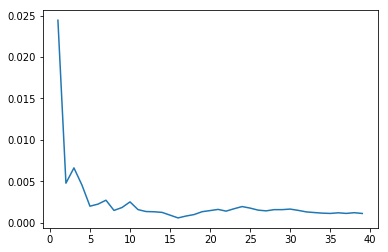

In [199]:
x_axis = np.arange(1,40)
plt.plot(x_axis, auc_var)

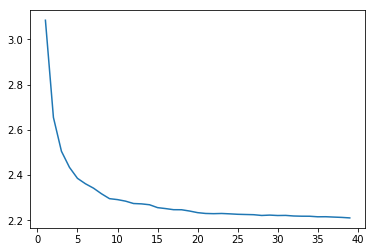

In [200]:
x_axis = np.arange(1,40)
plt.plot(x_axis, auc_avg)

## 6. Random Forest Regressor with Transformed Data

In [204]:
auc_avg = []
auc_var = []
for ne in np.arange(1,40):
    RF = RandomForestRegressor(criterion = 'mae', n_estimators = ne, random_state = 0, n_jobs = -1)
    kfold = model_selection.KFold(shuffle=True, n_splits=3, random_state=0)
    score = model_selection.cross_val_score(RF, x1, y1, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    auc_avg.append(np.mean(np.sqrt(np.abs(score))))
    auc_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))
    #print("%f (%f)" % (1-(np.mean(abs(score))), np.var(abs(score), ddof = 1)))
    #print("%f (%f)" % (np.mean(np.sqrt(np.abs(score))), np.var(np.sqrt(np.abs(score)),ddof=1)))

In [205]:
print(np.min(auc_avg))
print(np.argmin(auc_avg))

2.2139296585338752
38


In [206]:
print(auc_var[38])

0.0011703701663293023


In [207]:
print(np.min(auc_var))
print(np.argmin(auc_var))

0.00035670229785247996
15


In [208]:
print(auc_avg[15])

2.257137993790153


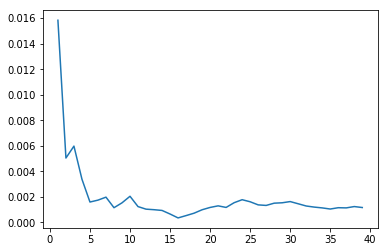

In [209]:
x_axis = np.arange(1,40)
plt.plot(x_axis, auc_var)

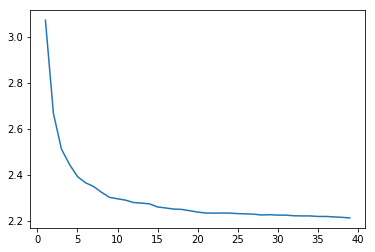

In [210]:
x_axis = np.arange(1,40)
plt.plot(x_axis, auc_avg)

## 7. Bagging Model with Linear Regression:

In [231]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,100):
    lr1 = LinearRegression()
    Bag = BaggingRegressor(base_estimator = lr1, n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=5, random_state=0)
    score = model_selection.cross_val_score(Bag, x, y, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [232]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.219718896421948
96


In [239]:
print(rmse_var[96])

0.01930608673562897


In [234]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.01903482666032747
52


In [238]:
print(rmse_avg[52])

2.220060916000127


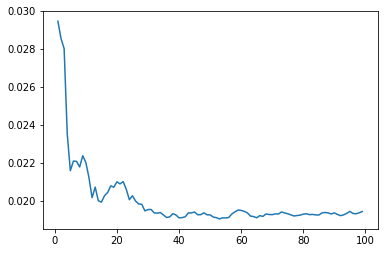

In [237]:
x_axis = np.arange(1,100)
plt.plot(x_axis, rmse_var)

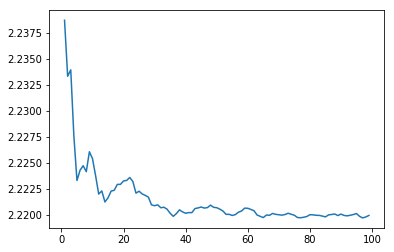

In [240]:
x_axis = np.arange(1,100)
plt.plot(x_axis, rmse_avg)

## 8. Bagged Model with Linear Regression on Transformed data:

In [241]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,100):
    lr1 = LinearRegression()
    Bag = BaggingRegressor(base_estimator = lr1, n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=5, random_state=0)
    score = model_selection.cross_val_score(Bag, x1, y1, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [242]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.148008015000431
35


In [243]:
print(rmse_var[35])

0.008222139754328131


In [244]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.008206562657374922
11


In [245]:
print(rmse_avg[11])

2.15029893747327


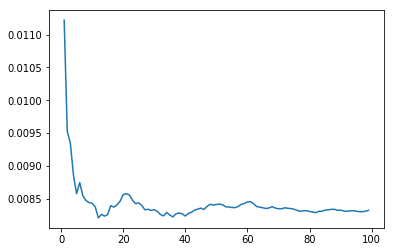

In [246]:
x_axis = np.arange(1,100)
plt.plot(x_axis, rmse_var)

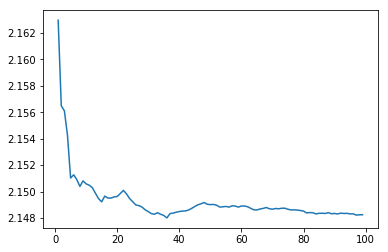

In [247]:
x_axis = np.arange(1,100)
plt.plot(x_axis, rmse_avg)

## 9. Bagged Model with KNN Regressor:

In [248]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,50):
    KNN = KNeighborsRegressor(n_neighbors = 16, weights = 'distance')
    Bag = BaggingRegressor(base_estimator = KNN, n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=5, random_state=0)
    score = model_selection.cross_val_score(Bag, x, y, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [249]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.1829639383921933
35


In [250]:
print(rmse_var[35])

0.003086173109501133


In [251]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.0028476940846501107
19


In [252]:
print(rmse_avg[19])

2.1860496775963525


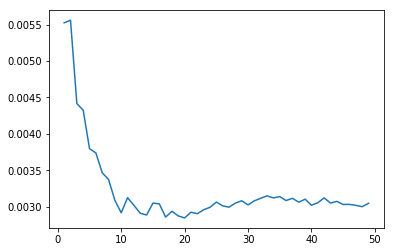

In [253]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_var)

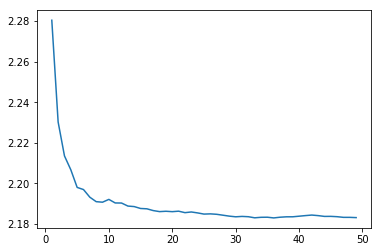

In [254]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_avg)

## 10. Bagged Model with KNN Regressor on Transformed data:

In [255]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,50):
    KNN = KNeighborsRegressor(n_neighbors = 16, weights = 'distance')
    Bag = BaggingRegressor(base_estimator = KNN, n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=5, random_state=0)
    score = model_selection.cross_val_score(Bag, x1, y1, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [256]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.1816120200704043
32


In [257]:
print(rmse_var[32])

0.0036019785823950164


In [259]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.0032618009996340795
12


In [260]:
print(rmse_avg[12])

2.1828268898561576


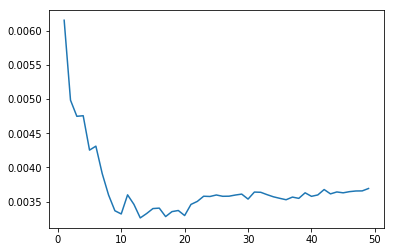

In [261]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_var)

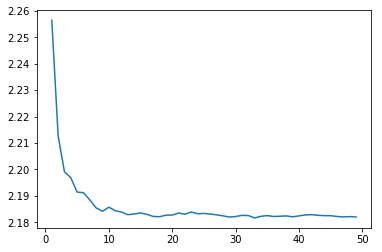

In [262]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_avg)

## 11. Bagged Model with Decision Tree

In [263]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,50):
    Bag = BaggingRegressor(n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=3, random_state=0)
    score = model_selection.cross_val_score(Bag, x, y, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [264]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.198006829697369
48


In [265]:
print(rmse_var[48])

0.003728036727205014


In [266]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.0034935054788229484
37


In [267]:
print(rmse_avg[37])

2.203751315319323


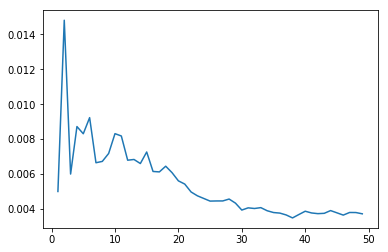

In [268]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_var)

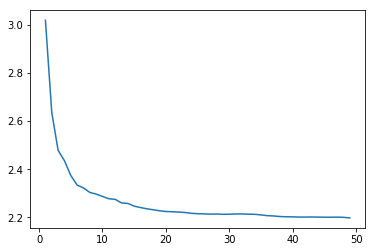

In [269]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_avg)

## 12. Bagged Model with Decision Tree on Transformed data:

In [273]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,50):
    Bag = BaggingRegressor(n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=3, random_state=0)
    score = model_selection.cross_val_score(Bag, x1, y1, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [274]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.2178479518892886
47


In [276]:
print(rmse_var[47])

0.0015484042406192816


In [275]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.0014863916152855496
37


In [277]:
print(rmse_avg[37])

2.224926976803314


## 13. Gradient Boosting model:

In [280]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,50):
    GBoost = GradientBoostingRegressor(n_estimators=ne,random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=3, random_state=0)
    score = model_selection.cross_val_score(GBoost, x, y, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [281]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.208780330907997
46


In [282]:
print(rmse_var[46])

0.0023851540457579205


In [283]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.00043305892997363987
15


In [284]:
print(rmse_avg[15])

2.3483714030498106


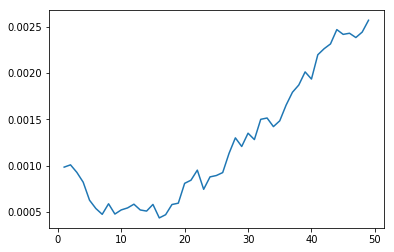

In [285]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_var)

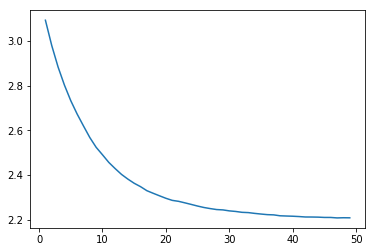

In [286]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_avg)

## 14. Gradient Boosting model on Transformed model:

In [287]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,50):
    GBoost = GradientBoostingRegressor(n_estimators=ne,random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=3, random_state=0)
    score = model_selection.cross_val_score(GBoost, x1, y1, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [288]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.20823955264906
46


In [289]:
print(rmse_var[46])

0.0023344545953267906


In [290]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.0004353667589222153
15


In [291]:
print(rmse_avg[15])

2.3483926265136863


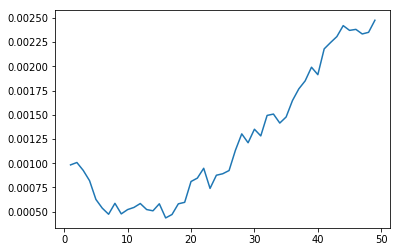

In [292]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_var)

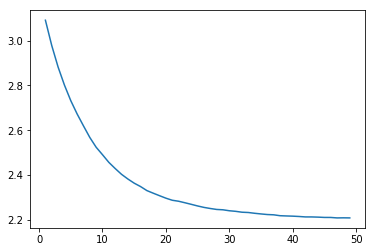

In [293]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_avg)

## 15. Adaboost Model with Linear Regression:

In [294]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,50):
    lr = LinearRegression()
    Adaboost_lr = AdaBoostRegressor(base_estimator = lr, n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=3, random_state=0)
    score = model_selection.cross_val_score(Adaboost_lr, x, y, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [295]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.2264891901297257
0


In [296]:
print(rmse_var[0])

0.006104044941425274


In [297]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.004331273328292694
4


In [298]:
print(rmse_avg[4])

2.248929917315609


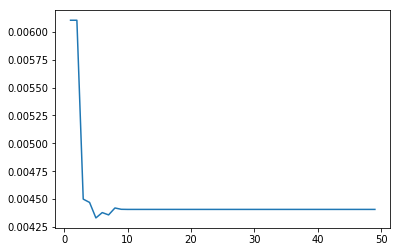

In [299]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_var)

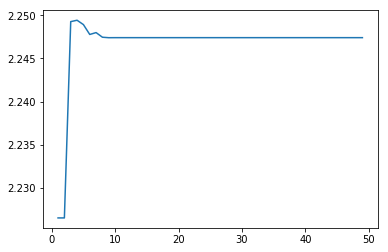

In [300]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_avg)

## 16. Adaboost model with Linear Regression on Transformed data:

In [301]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,50):
    lr = LinearRegression()
    Adaboost_lr = AdaBoostRegressor(base_estimator = lr, n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=3, random_state=0)
    score = model_selection.cross_val_score(Adaboost_lr, x1, y1, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [302]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.156649418099191
0


In [303]:
print(rmse_var[0])

0.0013983539607010517


In [304]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.0004444862833766212
4


In [305]:
print(rmse_avg[4])

2.1851216409967296


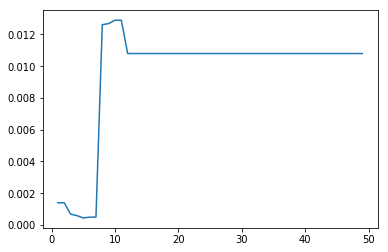

In [306]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_var)

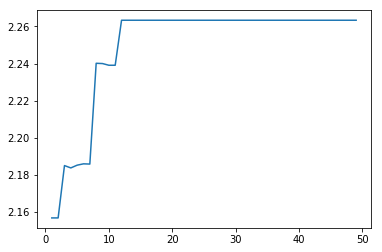

In [307]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_avg)

## 17. Adaboost model on KNN Regressor:

In [308]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,50):
    KNN = KNeighborsRegressor(n_neighbors = 16, weights = 'distance')
    Adaboost_knn = AdaBoostRegressor(base_estimator = KNN, n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=5, random_state=0)
    score = model_selection.cross_val_score(Adaboost_knn, x, y, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [309]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.22721410340328
5


In [311]:
print(rmse_var[5])

0.005155518568812467


In [312]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.001772720073955428
20


In [313]:
print(rmse_avg[20])

2.255188533296825


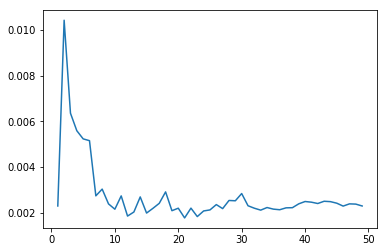

In [314]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_var)

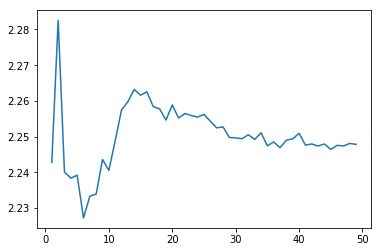

In [315]:
x_axis = np.arange(1,50)
plt.plot(x_axis, rmse_avg)

## 18. Adaboost model with KNN Regressor on Transformed data:

In [316]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,40):
    KNN = KNeighborsRegressor(n_neighbors = 16, weights = 'distance')
    Adaboost_knn = AdaBoostRegressor(base_estimator = KNN, n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=5, random_state=0)
    score = model_selection.cross_val_score(Adaboost_knn, x1, y1, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [317]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.2388326813082724
8


In [318]:
print(rmse_var[8])

0.004663861576078377


In [319]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.001629787778869287
31


In [320]:
print(rmse_avg[31])

2.247268247614406


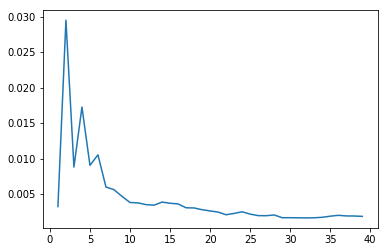

In [321]:
x_axis = np.arange(1,40)
plt.plot(x_axis, rmse_var)

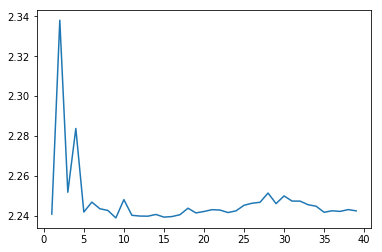

In [322]:
x_axis = np.arange(1,40)
plt.plot(x_axis, rmse_avg)

## 19. Adaboost model with Decision Tree:

In [323]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,30):
    Adaboost = AdaBoostRegressor(n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=5, random_state=0)
    score = model_selection.cross_val_score(Adaboost, x, y, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [324]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.4333141831527563
4


In [325]:
print(rmse_var[4])

0.003769377095419909


In [326]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.0017814479581262802
7


In [331]:
print(rmse_avg[7])

2.453106625310229


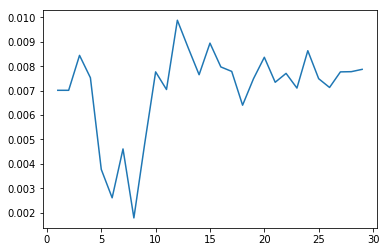

In [329]:
x_axis = np.arange(1,30)
plt.plot(x_axis, rmse_var)

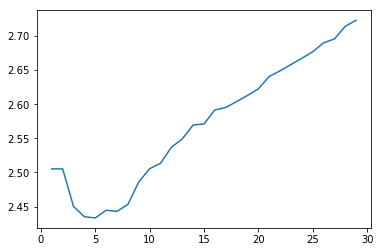

In [330]:
x_axis = np.arange(1,30)
plt.plot(x_axis, rmse_avg)

## 20. Adaboost model with Decision Tree on Transformed data:

In [332]:
rmse_avg = []
rmse_var = []
for ne in np.arange(1,30):
    Adaboost = AdaBoostRegressor(n_estimators=ne, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=5, random_state=0)
    score = model_selection.cross_val_score(Adaboost, x1, y1, cv=kfold, 
                                          scoring='neg_mean_squared_error' ) # fit, train, predict
    rmse_avg.append(np.mean(np.sqrt(np.abs(score))))
    rmse_var.append(np.var(np.sqrt(np.abs(score)),ddof=1))

In [333]:
print(np.min(rmse_avg))
print(np.argmin(rmse_avg))

2.4273481669958485
5


In [334]:
print(rmse_var[5])

0.005974975372718345


In [335]:
print(np.min(rmse_var))
print(np.argmin(rmse_var))

0.00223703683793694
11


In [336]:
print(rmse_avg[11])

2.5129421101400338


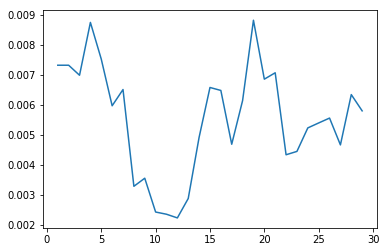

In [337]:
x_axis = np.arange(1,30)
plt.plot(x_axis, rmse_var)

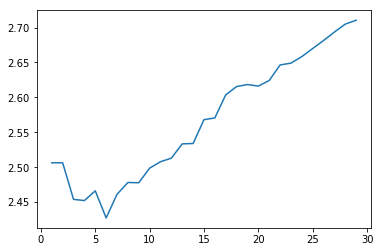

In [338]:
x_axis = np.arange(1,30)
plt.plot(x_axis, rmse_avg)

# Putting it all together:

<b>In the above models, bias and variance values were calculated from the MSE value. They are used for comparing the model performances. The number of estimators the models was tested on was no more than 50 for the ensemble models.  </b>